# Weather Data Exploration #
1. Extracted the weather data from udacity using 

    
    SELECT *
    FROM city_data
    
    SELECT *
    FROM global_data

    * Opted out of the city list because it can be extracted from city_data.csv
    
    
2. Import needed python packages 
3. Check the DataFrames
    * nulls
    * column dtypes
    * local weather
4. Find running averages
    * All cities individually
    * Global average

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
city_df = pd.read_csv('city_data.csv')
city_df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


### Find ###
Right away from viewing the data top 5 rows(or paying attention to the SQL output) I can see null values in the avg_temp 

In [3]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      70792 non-null  int64  
 1   city      70792 non-null  object 
 2   country   70792 non-null  object 
 3   avg_temp  68245 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [4]:
global_df = pd.read_csv('global_data.csv')
global_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


### Find ###
* There happens to be no nulls in the global average
* The data types for the two tables are
    - city_data:
        + 'year': int64
        + 'city': str
        + 'country': str
        + 'avg_temp': float64
    - global_data:
        + 'year': int64
        + 'avg_temp': float64

Next I should set the dtype of the year column as datetime

In [6]:
city_df['year'] = pd.to_datetime(city_df['year'],format='%Y')
global_df['year'] = pd.to_datetime(global_df['year'],format='%Y')

In [7]:
city_df.head()

,year,city,country,avg_temp
0,1849-01-01,Abidjan,Côte D'Ivoire,25.58
1,1850-01-01,Abidjan,Côte D'Ivoire,25.52
2,1851-01-01,Abidjan,Côte D'Ivoire,25.67
3,1852-01-01,Abidjan,Côte D'Ivoire,NaN
4,1853-01-01,Abidjan,Côte D'Ivoire,NaN


### Observation ###
I'm not sure if setting the year column to datetime format is necessary, and it makes it look as if all the dates were taken on the first of the year but I think it will allow for different plotting for a time series 

In [8]:
city_df.head()

,year,city,country,avg_temp
0,1849-01-01,Abidjan,Côte D'Ivoire,25.58
1,1850-01-01,Abidjan,Côte D'Ivoire,25.52
2,1851-01-01,Abidjan,Côte D'Ivoire,25.67
3,1852-01-01,Abidjan,Côte D'Ivoire,NaN
4,1853-01-01,Abidjan,Côte D'Ivoire,NaN


In [9]:
city_df[city_df['city'] == 'Los Angeles']

,year,city,country,avg_temp
36448,1855-01-01,Los Angeles,Chile,10.20
36449,1856-01-01,Los Angeles,Chile,12.01
36450,1857-01-01,Los Angeles,Chile,12.06
36451,1858-01-01,Los Angeles,Chile,12.13
36452,1859-01-01,Los Angeles,Chile,12.39
...,...,...,...,...
36767,2009-01-01,Los Angeles,United States,16.68
36768,2010-01-01,Los Angeles,United States,15.89
36769,2011-01-01,Los Angeles,United States,15.87
36770,2012-01-01,Los Angeles,United States,17.09


### Find ###
There happens to be two cities with 'Los Angeles' which means to find my local weather trends I must also make sure the country is 'United States'

In [10]:
local_df = city_df.loc[(city_df['city'] == 'Los Angeles') & (city_df['country'] == 'United States')].copy()
local_df = local_df.reset_index(drop=True)

## Engineering data ##
I now need to add rolling averages to the global and local data set in order to smooth out the plot and to allow for null values to be calculated as something else without removing them from the set.

In [11]:
local_df['5_year_avg'] = local_df['avg_temp'].rolling(5,min_periods=1).mean()
local_df['decade_avg'] = local_df['avg_temp'].rolling(10,min_periods=1).mean()
local_df.head()

,year,city,country,avg_temp,5_year_avg,decade_avg
0,1849-01-01,Los Angeles,United States,15.71,15.710000,15.710000
1,1850-01-01,Los Angeles,United States,15.28,15.495000,15.495000
2,1851-01-01,Los Angeles,United States,15.53,15.506667,15.506667
3,1852-01-01,Los Angeles,United States,15.61,15.532500,15.532500
4,1853-01-01,Los Angeles,United States,16.27,15.680000,15.680000


In [12]:
global_df['5_year_avg'] = global_df['avg_temp'].rolling(5,min_periods=1).mean()
global_df['decade_avg'] = global_df['avg_temp'].rolling(10,min_periods=1).mean()
global_df.head()

,year,avg_temp,5_year_avg,decade_avg
0,1750-01-01,8.72,8.720000,8.720000
1,1751-01-01,7.98,8.350000,8.350000
2,1752-01-01,5.78,7.493333,7.493333
3,1753-01-01,8.39,7.717500,7.717500
4,1754-01-01,8.47,7.868000,7.868000


In [13]:
len(local_df), len(global_df)

(165, 266)

### Find ###
The local dataset has 99 less dates then the global. To make comparing the trends between them easier I will remove all of the global rows that come before the starting year in the local set.

In [14]:
global_df.drop(global_df[global_df['year'] < local_df['year'][0]].index, inplace=True)

In [15]:
global_df = global_df.reset_index(drop=True)

### Drawing Conclusions ###
Now to plot the two data frames
first in sperate frames using plot, then to use matplotlib to combine for easier comparison.

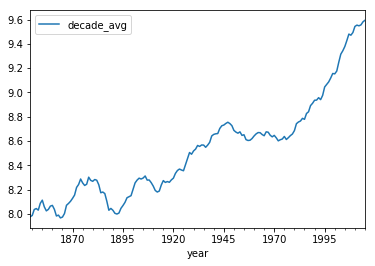

In [16]:
global_df.plot(kind='line', x='year', y='decade_avg');

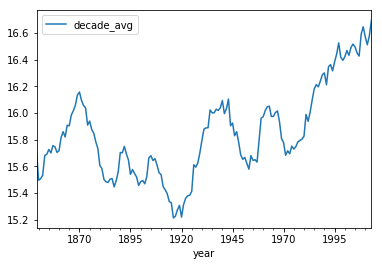

In [17]:
local_df.plot(kind='line', x='year', y='decade_avg');

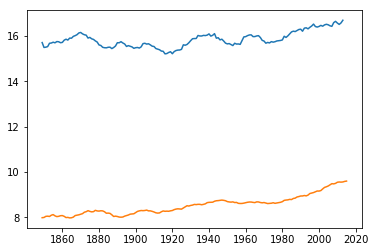

In [18]:
fig = plt.figure()

for frame in [local_df, global_df]:
    plt.plot(frame['year'], frame['decade_avg'])
    
plt.show();